In [1]:
#Q,1==Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

import pandas as pd
import numpy as np

In [34]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [35]:
df=pd.read_csv("crime_data.csv")
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [4]:
df.shape

(50, 5)

In [8]:
x=df.iloc[:,1:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_x=MM.fit_transform(x)

In [10]:
MM_x.shape

(50, 4)

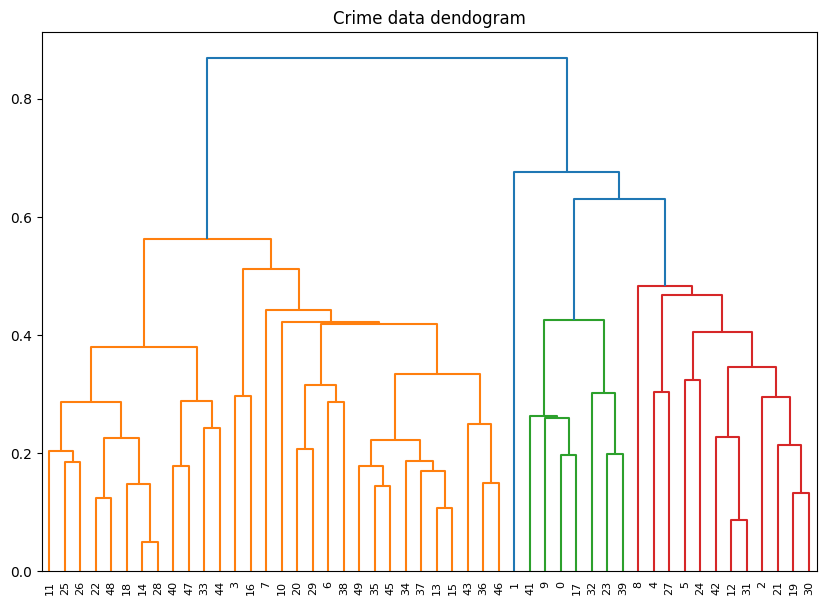

In [15]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
#construct dendogram
plt.figure(figsize=(10,7))
plt.title('Crime data dendogram')
dend = sch.dendrogram(sch.linkage(MM_x,method='average'))

In [20]:
#create cluster
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')


In [36]:
y=cluster.fit_predict(MM_x)
y1 = pd.DataFrame(y,columns=['clusters'])
y2=pd.concat([df,y1],axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
y2

Unnamed: 0  Murder  Assault  UrbanPop  Rape  clusters
0          Alabama    13.2      236        58  21.2         3
1           Alaska    10.0      263        48  44.5         2
2          Arizona     8.1      294        80  31.0         1
3         Arkansas     8.8      190        50  19.5         0
4       California     9.0      276        91  40.6         1
5         Colorado     7.9      204        78  38.7         1
6      Connecticut     3.3      110        77  11.1         0
7         Delaware     5.9      238        72  15.8         0
8          Florida    15.4      335        80  31.9         1
9          Georgia    17.4      211        60  25.8         3
10          Hawaii     5.3       46        83  20.2         0
11           Idaho     2.6      120        54  14.2         0
12        Illinois    10.4      249        83  24.0         1
13         Indiana     7.2      113        65  21.0         0
14            Iowa     2.2       56        57  11.3         0
15          Kansas     6.0      115        66  18.0         0
16        Kentucky     9.7      109        52  16.3         0
17       Louisiana    15.4      249        66  22.2         3
18           Maine     2.1       83        51   7.8         0
19        Maryland    11.3      300        67  27.8         1
20   Massachusetts     4.4      149        85  16.3         0
21        Michigan    12.1      255        74  35.1         1
22       Minnesota     2.7       72        66  14.9         0
23     Mississippi    16.1      259        44  17.1         3
24        Missouri     9.0      178        70  28.2         1
25         Montana     6.0      109        53  16.4         0
26        Nebraska     4.3      102        62  16.5         0
27          Nevada    12.2      252        81  46.0         1
28   New Hampshire     2.1       57        56   9.5         0
29      New Jersey     7.4      159        89  18.8         0
30      New Mexico    11.4      285        70  32.1         1
31        New York    11.1      254        86  26.1         1
32  North Carolina    13.0      337        45  16.1         3
33    North Dakota     0.8       45        44   7.3         0
34            Ohio     7.3      120        75  21.4         0
35        Oklahoma     6.6      151        68  20.0         0
36          Oregon     4.9      159        67  29.3         0
37    Pennsylvania     6.3      106        72  14.9         0
38    Rhode Island     3.4      174        87   8.3         0
39  South Carolina    14.4      279        48  22.5         3
40    South Dakota     3.8       86        45  12.8         0
41       Tennessee    13.2      188        59  26.9         3
42           Texas    12.7      201        80  25.5         1
43            Utah     3.2      120        80  22.9         0
44         Vermont     2.2       48        32  11.2         0
45        Virginia     8.5      156        63  20.7         0
46      Washington     4.0      145        73  26.2         0
47   West Virginia     5.7       81        39   9.3         0
48       Wisconsin     2.6       53        66  10.8         0
49         Wyoming     6.8      161        60  15.6         0

In [45]:
y2.iloc[:,1:5].groupby(y2.clusters).mean()

Murder     Assault   UrbanPop       Rape
clusters                                             
0          4.870000  114.433333  63.633333  15.943333
1         10.883333  256.916667  78.333333  32.250000
2         10.000000  263.000000  48.000000  44.500000
3         14.671429  251.285714  54.285714  21.685714

In [46]:
#k-means
from sklearn.cluster import KMeans
KMeans()

KMeans()

In [47]:
kmeans=KMeans(n_clusters=5)


In [48]:
#fitting model
kmeans=kmeans.fit(MM_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
labels=kmeans.predict(MM_x)

In [50]:
#total within centroid sum of square
kmeans.inertia_
clust=[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i,random_state=0)
   kmeans.fit(MM_x)
   clust.append(kmeans.inertia_)
   clust

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

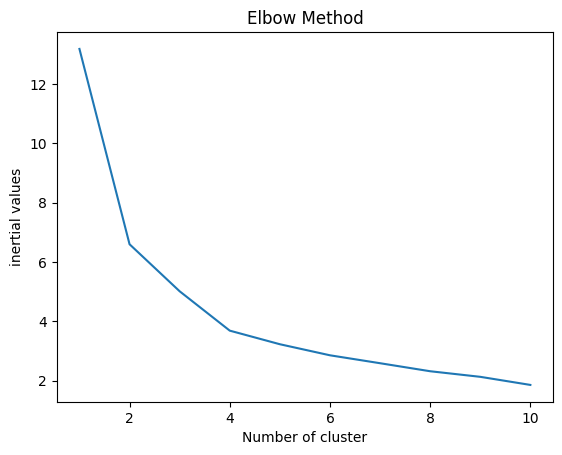

In [53]:

import matplotlib.pyplot as plt
plt.plot(range(1,11),clust)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('inertial values')
plt.show()

In [54]:
model= KMeans(n_clusters=5)
model.fit(MM_x)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 0, 2, 0, 0, 3, 2, 0, 4, 3, 1, 0, 2, 1, 2, 2, 4, 1, 0, 3, 0,
       1, 4, 2, 1, 1, 0, 1, 3, 0, 0, 4, 1, 3, 2, 2, 3, 3, 4, 1, 4, 0, 3,
       1, 2, 3, 1, 1, 2], dtype=int32)

In [57]:
Clust=pd.DataFrame(model.labels_,columns=['Clust'])
y3=pd.concat([df,Clust], axis=1)
y3

Unnamed: 0  Murder  Assault  UrbanPop  Rape  Clust
0          Alabama    13.2      236        58  21.2      4
1           Alaska    10.0      263        48  44.5      0
2          Arizona     8.1      294        80  31.0      0
3         Arkansas     8.8      190        50  19.5      2
4       California     9.0      276        91  40.6      0
5         Colorado     7.9      204        78  38.7      0
6      Connecticut     3.3      110        77  11.1      3
7         Delaware     5.9      238        72  15.8      2
8          Florida    15.4      335        80  31.9      0
9          Georgia    17.4      211        60  25.8      4
10          Hawaii     5.3       46        83  20.2      3
11           Idaho     2.6      120        54  14.2      1
12        Illinois    10.4      249        83  24.0      0
13         Indiana     7.2      113        65  21.0      2
14            Iowa     2.2       56        57  11.3      1
15          Kansas     6.0      115        66  18.0      2
16        Kentucky     9.7      109        52  16.3      2
17       Louisiana    15.4      249        66  22.2      4
18           Maine     2.1       83        51   7.8      1
19        Maryland    11.3      300        67  27.8      0
20   Massachusetts     4.4      149        85  16.3      3
21        Michigan    12.1      255        74  35.1      0
22       Minnesota     2.7       72        66  14.9      1
23     Mississippi    16.1      259        44  17.1      4
24        Missouri     9.0      178        70  28.2      2
25         Montana     6.0      109        53  16.4      1
26        Nebraska     4.3      102        62  16.5      1
27          Nevada    12.2      252        81  46.0      0
28   New Hampshire     2.1       57        56   9.5      1
29      New Jersey     7.4      159        89  18.8      3
30      New Mexico    11.4      285        70  32.1      0
31        New York    11.1      254        86  26.1      0
32  North Carolina    13.0      337        45  16.1      4
33    North Dakota     0.8       45        44   7.3      1
34            Ohio     7.3      120        75  21.4      3
35        Oklahoma     6.6      151        68  20.0      2
36          Oregon     4.9      159        67  29.3      2
37    Pennsylvania     6.3      106        72  14.9      3
38    Rhode Island     3.4      174        87   8.3      3
39  South Carolina    14.4      279        48  22.5      4
40    South Dakota     3.8       86        45  12.8      1
41       Tennessee    13.2      188        59  26.9      4
42           Texas    12.7      201        80  25.5      0
43            Utah     3.2      120        80  22.9      3
44         Vermont     2.2       48        32  11.2      1
45        Virginia     8.5      156        63  20.7      2
46      Washington     4.0      145        73  26.2      3
47   West Virginia     5.7       81        39   9.3      1
48       Wisconsin     2.6       53        66  10.8      1
49         Wyoming     6.8      161        60  15.6      2

In [59]:
y3.iloc[:,1:5].groupby(y3.Clust).mean()

Murder     Assault   UrbanPop       Rape
Clust                                             
0      10.966667  264.000000  76.500000  33.608333
1       3.091667   76.000000  52.083333  11.833333
2       7.340000  157.000000  63.300000  20.440000
3       4.955556  125.444444  80.111111  17.788889
4      14.671429  251.285714  54.285714  21.685714

In [69]:
#DBSCAn clustering

#standerization
x=df.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_ss = ss.fit_transform(x)
x_ss



array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [66]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [70]:
dbscan=DBSCAN(eps=1,min_samples=6)
dbscan.fit(x_ss)

DBSCAN(eps=1, min_samples=6)

In [71]:
dbscan.labels_          #(-1 are noise)

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0])

In [73]:
c1=pd.DataFrame(dbscan.labels_,columns=['DBclust'])
c1

DBclust
0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6         0
7        -1
8        -1
9        -1
10       -1
11        0
12       -1
13        0
14        0
15        0
16        0
17       -1
18        0
19       -1
20       -1
21       -1
22        0
23       -1
24        0
25        0
26        0
27       -1
28        0
29       -1
30       -1
31       -1
32       -1
33        0
34        0
35        0
36       -1
37        0
38       -1
39       -1
40        0
41       -1
42       -1
43       -1
44       -1
45        0
46        0
47        0
48        0
49        0

In [74]:
DBclust=pd.concat([df,c1],axis=1)
DBclust

Unnamed: 0  Murder  Assault  UrbanPop  Rape  DBclust
0          Alabama    13.2      236        58  21.2       -1
1           Alaska    10.0      263        48  44.5       -1
2          Arizona     8.1      294        80  31.0       -1
3         Arkansas     8.8      190        50  19.5       -1
4       California     9.0      276        91  40.6       -1
5         Colorado     7.9      204        78  38.7       -1
6      Connecticut     3.3      110        77  11.1        0
7         Delaware     5.9      238        72  15.8       -1
8          Florida    15.4      335        80  31.9       -1
9          Georgia    17.4      211        60  25.8       -1
10          Hawaii     5.3       46        83  20.2       -1
11           Idaho     2.6      120        54  14.2        0
12        Illinois    10.4      249        83  24.0       -1
13         Indiana     7.2      113        65  21.0        0
14            Iowa     2.2       56        57  11.3        0
15          Kansas     6.0      115        66  18.0        0
16        Kentucky     9.7      109        52  16.3        0
17       Louisiana    15.4      249        66  22.2       -1
18           Maine     2.1       83        51   7.8        0
19        Maryland    11.3      300        67  27.8       -1
20   Massachusetts     4.4      149        85  16.3       -1
21        Michigan    12.1      255        74  35.1       -1
22       Minnesota     2.7       72        66  14.9        0
23     Mississippi    16.1      259        44  17.1       -1
24        Missouri     9.0      178        70  28.2        0
25         Montana     6.0      109        53  16.4        0
26        Nebraska     4.3      102        62  16.5        0
27          Nevada    12.2      252        81  46.0       -1
28   New Hampshire     2.1       57        56   9.5        0
29      New Jersey     7.4      159        89  18.8       -1
30      New Mexico    11.4      285        70  32.1       -1
31        New York    11.1      254        86  26.1       -1
32  North Carolina    13.0      337        45  16.1       -1
33    North Dakota     0.8       45        44   7.3        0
34            Ohio     7.3      120        75  21.4        0
35        Oklahoma     6.6      151        68  20.0        0
36          Oregon     4.9      159        67  29.3       -1
37    Pennsylvania     6.3      106        72  14.9        0
38    Rhode Island     3.4      174        87   8.3       -1
39  South Carolina    14.4      279        48  22.5       -1
40    South Dakota     3.8       86        45  12.8        0
41       Tennessee    13.2      188        59  26.9       -1
42           Texas    12.7      201        80  25.5       -1
43            Utah     3.2      120        80  22.9       -1
44         Vermont     2.2       48        32  11.2       -1
45        Virginia     8.5      156        63  20.7        0
46      Washington     4.0      145        73  26.2        0
47   West Virginia     5.7       81        39   9.3        0
48       Wisconsin     2.6       53        66  10.8        0
49         Wyoming     6.8      161        60  15.6        0

In [75]:
noisedata= DBclust[DBclust['DBclust']==-1]
print(noisedata)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  DBclust
0          Alabama    13.2      236        58  21.2       -1
1           Alaska    10.0      263        48  44.5       -1
2          Arizona     8.1      294        80  31.0       -1
3         Arkansas     8.8      190        50  19.5       -1
4       California     9.0      276        91  40.6       -1
5         Colorado     7.9      204        78  38.7       -1
7         Delaware     5.9      238        72  15.8       -1
8          Florida    15.4      335        80  31.9       -1
9          Georgia    17.4      211        60  25.8       -1
10          Hawaii     5.3       46        83  20.2       -1
12        Illinois    10.4      249        83  24.0       -1
17       Louisiana    15.4      249        66  22.2       -1
19        Maryland    11.3      300        67  27.8       -1
20   Massachusetts     4.4      149        85  16.3       -1
21        Michigan    12.1      255        74  35.1       -1
23     Mississippi    16

In [76]:
finaldata= DBclust[DBclust['DBclust']==0]
print(finaldata)

       Unnamed: 0  Murder  Assault  UrbanPop  Rape  DBclust
6     Connecticut     3.3      110        77  11.1        0
11          Idaho     2.6      120        54  14.2        0
13        Indiana     7.2      113        65  21.0        0
14           Iowa     2.2       56        57  11.3        0
15         Kansas     6.0      115        66  18.0        0
16       Kentucky     9.7      109        52  16.3        0
18          Maine     2.1       83        51   7.8        0
22      Minnesota     2.7       72        66  14.9        0
24       Missouri     9.0      178        70  28.2        0
25        Montana     6.0      109        53  16.4        0
26       Nebraska     4.3      102        62  16.5        0
28  New Hampshire     2.1       57        56   9.5        0
33   North Dakota     0.8       45        44   7.3        0
34           Ohio     7.3      120        75  21.4        0
35       Oklahoma     6.6      151        68  20.0        0
37   Pennsylvania     6.3      106      

In [78]:
DBclust.iloc[:,1:5].groupby(DBclust.DBclust).mean()

Murder     Assault   UrbanPop       Rape
DBclust                                            
-1       9.992857  221.785714  69.392857  25.621429
 0       4.981818  105.818182  60.636364  15.645455

In [83]:
#Q.2--->Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [80]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [84]:
fd=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
fd

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [85]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [86]:
fd.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [87]:
x=fd.iloc[:,:]

In [88]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_x=MM.fit_transform(x)

In [91]:
MM_x.shape

(3999, 12)

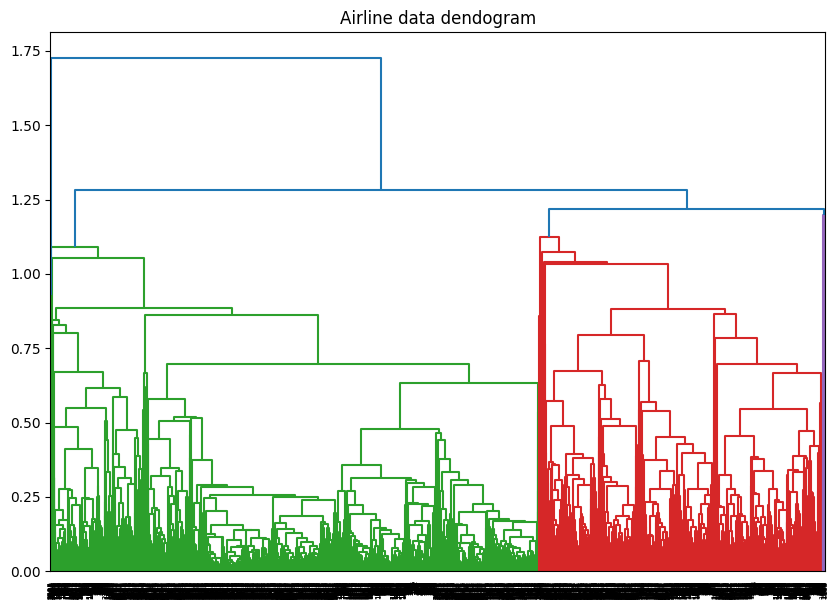

In [92]:
#construct dendogram
plt.figure(figsize=(10,7))
plt.title('Airline data dendogram')
dend = sch.dendrogram(sch.linkage(MM_x,method='average'))

In [165]:

#create cluster
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [104]:
y= ac.fit_predict(MM_x)
y4 = pd.DataFrame(y,columns=['clusters'])
y5=pd.concat([fd,y4],axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [105]:
y5

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  
0          0         1  
1          0         1  
2          0         1  
3          0         1  
4          1         0  
...      ...       ...  
3994       1         0  
3995       1         0  
3996       1         0  
3997       0         1  
3998       0         1  

[3999 rows x 13 columns]

In [106]:
y5.iloc[:,1:12].groupby(y5.clusters).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clusters                                                               
0          97010.442568  240.020946   2.662838   1.015541   1.018243   
1          59807.839555   87.602462   1.705322   1.013900   1.008737   
2         160114.000000  500.000000   1.000000   1.000000   1.000000   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clusters                                                                  
0         28876.327703    15.735135         837.258108         2.565541   
1         10227.689039     9.142971         226.292295         0.652502   
2         71954.000000    86.000000       30817.000000        53.000000   

          Days_since_enroll  Award?  
clusters                             
0               4627.259459     1.0  
1               3820.652105     0.0  
2               1373.000000     1.0

In [ ]:
#k-means clustering


In [107]:
from sklearn.cluster import KMeans
KMeans()

KMeans()

In [109]:
kmeans=KMeans(n_clusters=5)
kmeans=kmeans.fit(MM_x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
kmeans.inertia_
clust=[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i,random_state=0)
   kmeans.fit(MM_x)
   clust.append(kmeans.inertia_)
   clust

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

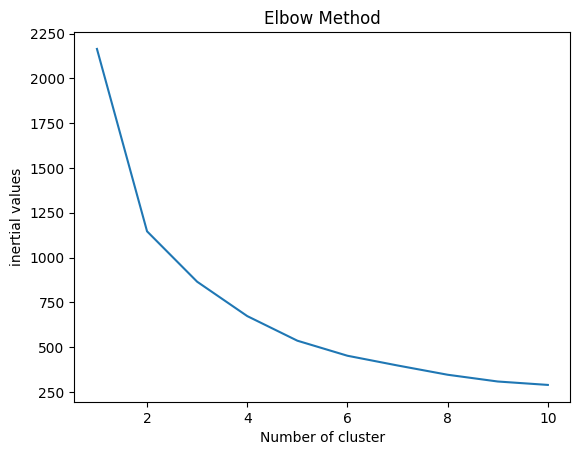

In [111]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),clust)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('inertial values')
plt.show()

In [112]:
model= KMeans(n_clusters=5)
model.fit(MM_x)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 3, 3], dtype=int32)

In [113]:
Clust=pd.DataFrame(model.labels_,columns=['kClust'])
y6=pd.concat([fd,Clust], axis=1)
y6

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  kClust  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1       2  
...      ...     ...  
3994       1       1  
3995       1       1  
3996       1       1  
3997       0       3  
3998       0       3  

[3999 rows x 13 columns]

In [116]:
y6.iloc[:,1:12].groupby(y6.kClust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
kClust                                                               
0        49674.980324   90.319444   1.118056   1.017361   1.001157   
1        78078.890152  274.411616   1.433081   1.027778   1.007576   
2       118863.698113  200.866473   4.074020   1.001451   1.030479   
3        35385.638164   94.610261   1.204320   1.017102   1.006301   
4       125899.655617   68.941068   3.664825   1.001842   1.025783   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
kClust                                                                  
0        3386.160880     6.824074         242.075231         0.719907   
1       10703.342172    11.363636         924.084596         2.804293   
2       49828.551524    20.862119         780.963716         2.364296   
3        4400.907291     6.941494         214.288029         0.598560   
4       33035.488029    17.337017         225.740331         0.655617   

        Days_since_enroll  Award?  
kClust                             
0             5570.855324     0.0  
1             4072.556818     1.0  
2             5260.162554     1.0  
3             1983.927093     0.0  
4             4793.812155     0.0

In [ ]:
#DBSCAN

In [155]:
x=fd.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_ss1= ss.fit_transform(x)
x_ss1



array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [156]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [157]:
dbscan=DBSCAN(eps=0.8,min_samples=12)
dbscan.fit(x_ss1)

DBSCAN(eps=0.8, min_samples=12)

In [158]:
dbscan.labels_  

array([0, 0, 0, ..., 1, 0, 0])

In [159]:
c2=pd.DataFrame(dbscan.labels_,columns=['DBclust'])

In [160]:
DBclust1=pd.concat([fd,c2],axis=1)
DBclust1

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  DBclust  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          1       -1  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        0  

[3999 rows x 13 columns]

In [161]:
noisedata= DBclust1[DBclust1['DBclust']==-1]
print(noisedata)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
...    ...      ...         ...        ...        ...        ...          ...   
3974  3997    58387           0          3          1          1        14581   
3979  4002    57793           0          3          1          1        20959   
3980  4003    28867           0          3          1          1        19169   
3985  4008    59017           0          4          1          1        34746   
3991  4014    39142           0          3          1          1        14981   

      Bonus_trans  Flight_m

In [162]:
finaldata= DBclust1[DBclust1['DBclust']==0]
print(finaldata)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3990  4013    11310           0          1          1          1         5021   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [163]:
DBclust1.iloc[:,1:12].groupby(DBclust1.DBclust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBclust                                                               
-1       153643.480331  592.975155   2.685300   1.060041   1.050725   
 0        46273.354430    0.703235   1.556493   1.000000   1.000000   
 1        47313.197320    2.436054   2.347138   1.000000   1.000000   
 2        88517.735849    0.000000   5.000000   1.000000   1.000000   
 3       143829.166667    0.000000   5.000000   1.000000   1.000000   
 4       139251.214286    0.000000   5.000000   1.000000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBclust                                                                  
-1       34663.012422    19.590062        1587.557971         4.595238   
 0        7397.959212     7.789498          80.463197         0.279419   
 1       17414.952497    11.605359         157.247259         0.532278   
 2       64327.037736    17.735849          80.301887         0.339623   
 3       62086.083333    16.083333          58.166667         0.166667   
 4       60420.071429    14.000000          35.714286         0.071429   

         Days_since_enroll    Award?  
DBclust                               
-1             4655.547619  0.628364  
 0             3753.015940  0.000000  
 1             4338.215591  1.000000  
 2             5806.056604  1.000000  
 3             5285.250000  0.000000  
 4             2489.857143  0.000000